# Connecting to the anvil app

In [ ]:
!pip install anvil-uplink

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.1/90.1 kB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.4/51.4 kB 5.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for ws4py: filename=ws4py-0.5.1-py3-none-any.whl size=45228 sha256=6f105f3c773ab62d5c7ecbfe528dc38b063182fc732356c3096fbd93ea9279bd
  Stored in directory: /root/.cache/pip/wheels/2e/7c/ad/d9c746276bf024d44296340869fcb169f1e5d80fb147351a57
Successfully built ws4py


In [ ]:
import anvil.server

anvil.server.connect("server_FMJAGAYZ2LOF4FAMVV4NIHA5-7RF5VXKGPE6J3YYD")

Connecting to wss://anvil.works/uplink
Anvil websocket open
Connected to "Default Environment" as SERVER


#Predicting Banking Customer Attrition with Neural Networks and EDA Approach

## Introduction

#### In the dynamic landscape of the banking industry, understanding and predicting customer churn are vital for maintaining a healthy and sustainable business. Customer churn refers to the phenomenon where customers cease their relationship with a bank, either by closing accounts or discontinuing the use of banking services. Identifying the factors that contribute to customer churn and building predictive models can empower banks to proactively address customer concerns, enhance customer satisfaction, and implement targeted retention strategies.


# Project Goal

The primary goal of this project is to leverage machine learning and neural network models to predict customer churn based on the provided features. By understanding the patterns and characteristics associated with customers who are more likely to churn, the bank can take proactive measures to retain such customers. Predictive models enable the identification of at-risk customers, allowing the bank to tailor retention strategies and thereby reduce customer turnover.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Import necessary libraries

In this project, several Python libraries have been imported to facilitate various aspects of data analysis, visualization, and model building. Each library serves a specific purpose and contributes to the overall workflow.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow
import keras
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# color patettes
color_1 = sns.color_palette("Accent",10)
color_2 = sns.color_palette("mako_r",10)
color_3 = sns.color_palette("Spectral_r",10)
color_4 = sns.color_palette()


## Dataset Overview

The dataset used in this analysis contains comprehensive information about bank customers, capturing various aspects of their interactions with the bank. Each entry in the dataset represents an individual customer and includes the following attributes:

1. Customer ID: A unique identifier for each customer

2. Surname: The customer's surname or last name

3. Credit Score: A numerical value representing the customer's credit score

4. Geography: The country where the customer resides (France, Spain or Germany)

5. Gender: The customer's gender (Male or Female)

6. Age: The customer's age.

7. Tenure: The number of years the customer has been with the bank

8. Balance: The customer's account balance

9. NumOfProducts: The number of bank products the customer uses (e.g., savings account, credit card)

10. HasCrCard: Whether the customer has a credit card (1 = yes, 0 = no)

11. IsActiveMember: Whether the customer is an active member (1 = yes, 0 = no)

12. EstimatedSalary: The estimated salary of the customer

13. Exited: Whether the customer has churned (1 = yes, 0 = no)



### Read dataset

In [ ]:
df = pd.read_csv(r"/content/drive/MyDrive/Colab Notebooks/Churn_Modelling 2.csv")
df.head() ## head fuction are showing top 5 rows data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,3,15619304,Onio,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,4,15701354,Boni,699,France,Female,39.0,1,0.00,2,0.0,0.0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43.0,2,125510.82,1,NaN,1.0,79084.10,0


In [ ]:
## check the dataset shape
df.shape

(10002, 14)

In [ ]:
## remove the unwanted columns

df.drop(["RowNumber","CustomerId","Surname"],axis=1,inplace=True)

In [ ]:
# check the columns
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [ ]:
# checking the duplicated values in data
df.duplicated().sum()

2

In [ ]:
# remove the duplicate values
df = df.drop_duplicates()
df.duplicated().sum()

0

In [ ]:
## checking the missing values
df.isna().sum()

CreditScore        0
Geography          1
Gender             0
Age                1
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          1
IsActiveMember     1
EstimatedSalary    0
Exited             0
dtype: int64

## Missing values
how to deal with missing values, you have tree option.

1. Get rid of the missing data points
2. delete the mising values columns and row.
3. Set the values of some value( mean ,median, mode).

In [ ]:
# checking the missing columns values then fill the null values
print(df["Geography"].mode()[0])
print(df["Age"].median())
print(df["HasCrCard"].median())
print(df["IsActiveMember"].median())

France
37.0
1.0
1.0


In [ ]:
## fill the missing values using the method (Mean,median,mode)
df["Geography"] = df["Geography"].fillna(df["Geography"].mode()[0])
df["Age"]= df["Age"].fillna(df["Age"].median())
df["HasCrCard"]=df["HasCrCard"].fillna(df["HasCrCard"].median())
df["IsActiveMember"] = df["IsActiveMember"].fillna(df["IsActiveMember"].median())

In [ ]:
# check the after fill missing values
df.isna().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [ ]:
## chek the datatype details wise
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 10000
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  float64
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  float64
 8   IsActiveMember   10000 non-null  float64
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(5), int64(4), object(2)
memory usage: 937.5+ KB


#### Upon observing the dataset, several key insights emerge, shedding light on its structure and composition. The dataset comprises a total of 11 columns, encompassing a diverse range of data types. Specifically, there are five columns with numerical data represented as float64, capturing attributes such as credit score, balance, and estimated salary. Four columns are of type int64, containing discrete numerical information like customer age, tenure the number of products used, and binary indicators like credit card possession and active membership status.

In [ ]:
## checking the Age sum because to check the any float values
df["Age"].sum()

389229.03

In [ ]:
## change  dtype float to int
df["Age"] = df["Age"].astype(int)

In [ ]:
## after change dtype
df["Age"].sum()

389228

In [ ]:
## after change dtype
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 10000
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  float64
 8   IsActiveMember   10000 non-null  float64
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(4), int64(5), object(2)
memory usage: 937.5+ KB


## Getting the statistical summary of dataset

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CreditScore,10000.0,650.528800,96.653299,350.00,584.00,652.000,718.0000,850.00
Age,10000.0,38.922800,10.487146,18.00,32.00,37.000,44.0000,92.00
Tenure,10000.0,5.012800,2.892174,0.00,3.00,5.000,7.0000,10.00
Balance,10000.0,76485.889288,62397.405202,0.00,0.00,97198.540,127644.2400,250898.09
NumOfProducts,10000.0,1.530200,0.581654,1.00,1.00,1.000,2.0000,4.00
HasCrCard,10000.0,0.705500,0.455840,0.00,0.00,1.000,1.0000,1.00
IsActiveMember,10000.0,0.515100,0.499797,0.00,0.00,1.000,1.0000,1.00
EstimatedSalary,10000.0,100090.239881,57510.492818,11.58,51002.11,100193.915,149388.2475,199992.48
Exited,10000.0,0.203700,0.402769,0.00,0.00,0.000,0.0000,1.00


# Data Visualization

In the realm of data visualization, a comprehensive approach has been adopted to distill meaningful insights from the bank customer churn dataset. Employing prominent Python libraries such as Seaborn and Matplotlib, a diverse set of visualizations has been created to unravel patterns and trends within the data.



## Bar and Pie Charts:

Bar charts have been leveraged to visualize the distribution of categorical variables such as customer exits, geography, and gender. These visualizations provide a clear understanding of the proportions and trends within these categorical features. Additionally, pie charts have been employed to offer a concise representation of the distribution of exited and current customers.



0    7963
1    2037
Name: Exited, dtype: int64


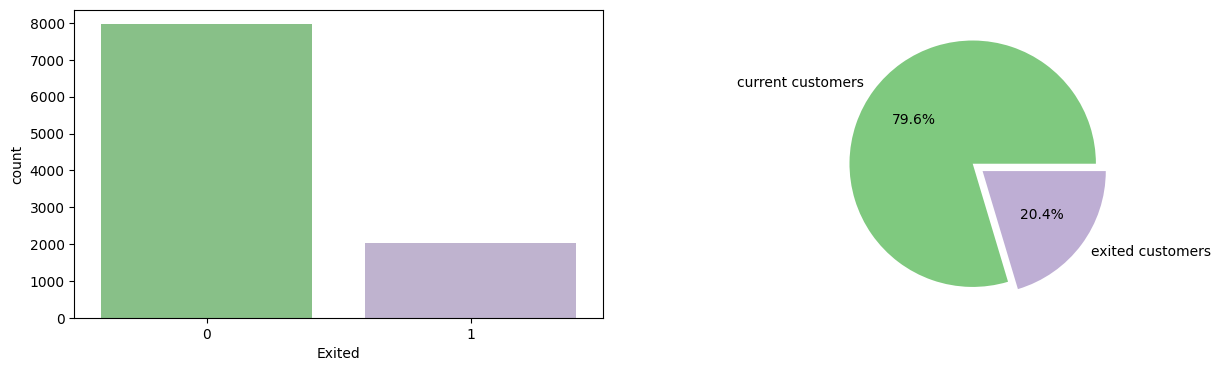

In [ ]:
# find the the insight the exited columns and visualization using the countplot for seaborn and pie plot.
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
sns.countplot(x=df["Exited"],palette=color_1)

plt.subplot(1,2,2)
plt.pie(df["Exited"].value_counts(),explode=[0.0,0.1],labels=["current customers","exited customers"],
        colors=color_1,autopct="%.01f%%")
print(df["Exited"].value_counts())


Exited  Geography
0       France       4204
        Spain        2064
        Germany      1695
1       Germany       814
        France        810
        Spain         413
Name: Geography, dtype: int64


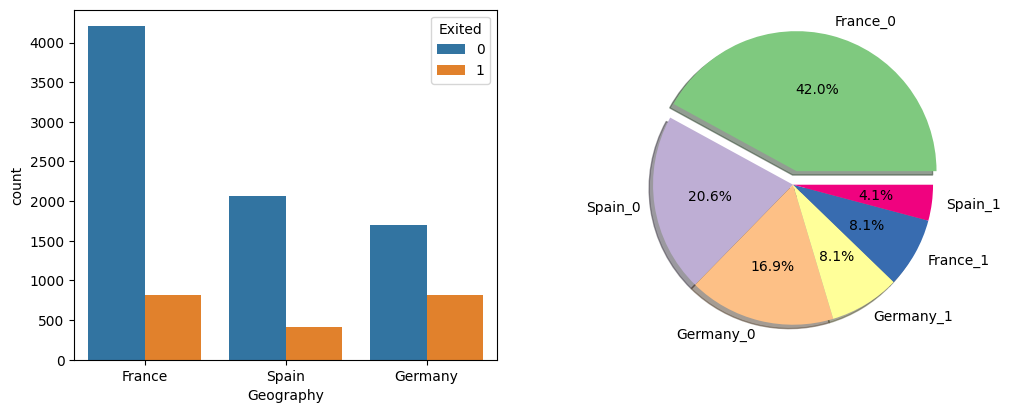

In [ ]:
# find the insight and visualation plot wise

label = ["France_0","Spain_0","Germany_0","Germany_1","France_1","Spain_1"]
eplode = [0.1,0.0,0.0,0.0,0.0,0.0]
plt.figure(figsize=(12,10))
plt.subplot(2,2,1)
sns.countplot(data=df,x="Geography",hue="Exited",palette=color_4)
plt.subplot(2,2,2)
plt.pie(df.Geography.groupby(df.Exited).value_counts(),explode=eplode,shadow=True,colors=color_1,
        labels=label,autopct="%0.1f%%")


print(df.Geography.groupby(df.Exited).value_counts())


The analysis reveals a noteworthy trend in customer churn based on geography, with Germany and France exhibiting a higher exit rate of 8.1%, while Spain shows a comparatively lower churn rate of 4.1%. This geographical insight emphasizes potential regional variations in customer retention.

Exited  Gender
0       Male      4559
        Female    3404
1       Female    1139
        Male       898
Name: Gender, dtype: int64


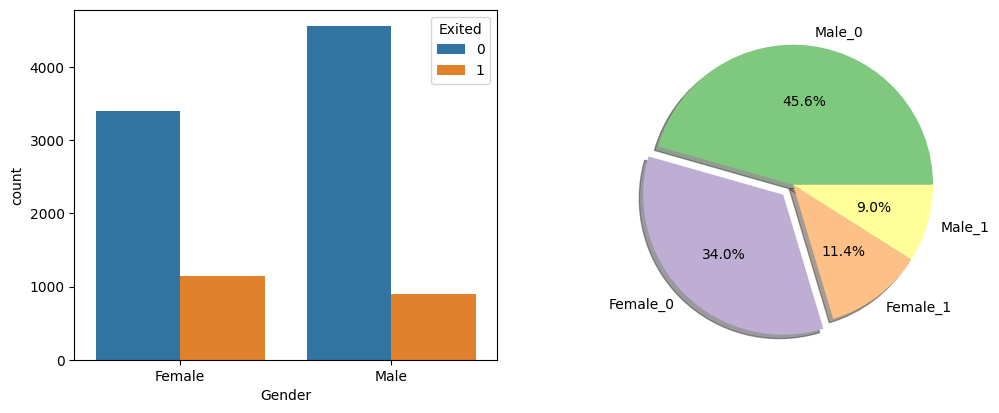

In [ ]:
# find the insight and visualation plot wise

label = ["Male_0","Female_0","Female_1","Male_1"]
eplode = [0.0,0.1,0.0,0.0]
plt.figure(figsize=(12,10))
plt.subplot(2,2,1)
sns.countplot(data=df, x="Gender",hue="Exited",palette=color_4)
plt.subplot(2,2,2)
plt.pie(df.Gender.groupby(df.Exited).value_counts(),explode=eplode,
        labels=label,colors=color_1,shadow=True,autopct="%0.1f%%")

print(df.Gender.groupby(df.Exited).value_counts())


The examination of gender-related churn patterns exposes a disparity, with approximately 11.4% of female customers exiting compared to around 9% for male customers. This gender-specific insight indicates a nuanced influence on customer churn within the dataset.


Exited  NumOfProducts
0       2                4242
        1                3675
        3                  46
1       1                1409
        2                 348
        3                 220
        4                  60
Name: NumOfProducts, dtype: int64
------------------------------
Exited  HasCrCard
0       1.0          5631
        0.0          2332
1       1.0          1424
        0.0           613
Name: HasCrCard, dtype: int64
------------------------------
Exited  IsActiveMember
0       1.0               4416
        0.0               3547
1       0.0               1302
        1.0                735
Name: IsActiveMember, dtype: int64


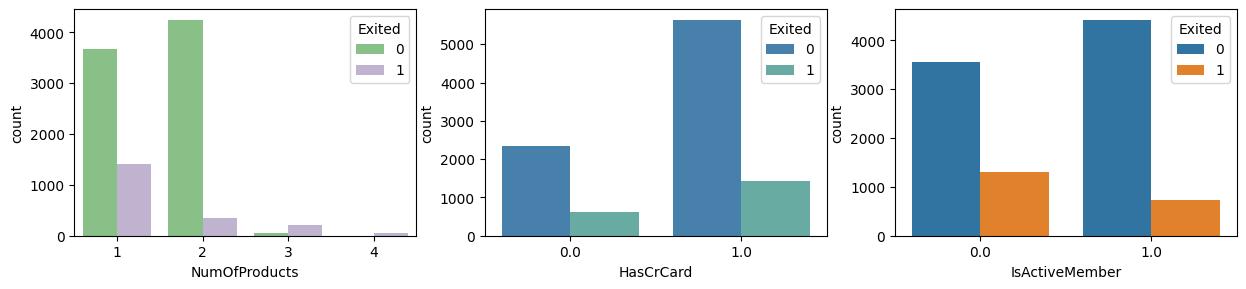

In [ ]:
plt.figure(figsize=(15,10))
plt.subplot(3,3,1)
sns.countplot(data=df,x="NumOfProducts",hue="Exited",palette=color_1)
plt.subplot(3,3,2)
sns.countplot(data=df,x="HasCrCard",hue="Exited",palette=color_3)
plt.subplot(3,3,3)
sns.countplot(data=df,x="IsActiveMember",hue="Exited",palette=color_4)


print(df.NumOfProducts.groupby(df.Exited).value_counts())
print("--"*15)
print(df.HasCrCard.groupby(df.Exited).value_counts())
print("--"*15)
print(df.IsActiveMember.groupby(df.Exited).value_counts())

The analysis of customer churn concerning the "NumOfProducts" column unveils a predominant trend, indicating that customers with a single product (1 NumOfProducts) exhibit the highest exit count, totaling 1409. Additionally, within the "HasCrCard" column, a substantial proportion of customers holding a credit card (HasCrCard = 1) experienced exits, with the count reaching 1424.

Furthermore, the "IsActiveMember" column highlights that customers with an inactive membership (IsActiveMember = 0) contribute significantly to churn, accounting for 1302 exits, while active members (IsActiveMember = 1) have a lower exit count of 735. These insights emphasize the influence of product count, credit card possession, and membership activity on customer churn dynamics.

 # Boxplots:

Boxplots have been utilized to unveil statistical distributions and identify potential outliers within numerical features like credit score, age, balance, and estimated salary. These visualizations offer a succinct summary of the central tendency, spread, and potential anomalies in these critical attributes.

Exited  CreditScore
0       850            190
        678             50
1       850             43
0       684             43
        655             43
                      ... 
1       404              1
        405              1
        407              1
        408              1
0       405              1
Length: 862, dtype: int64
------------------------------
Exited  Age
0       37     417
        35     417
        38     414
        34     414
        36     403
              ... 
        88       1
        85       1
        84       1
        83       1
1       84       1
Length: 128, dtype: int64


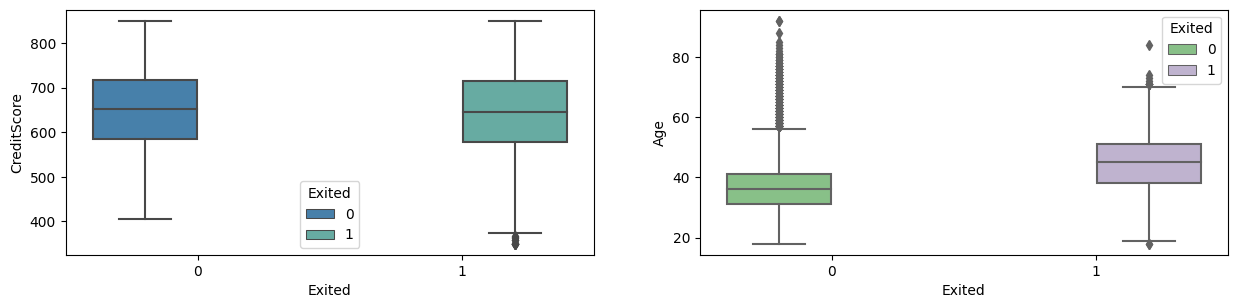

In [ ]:

plt.figure(figsize=(15,7))
plt.subplot(2,2,1)
sns.boxplot(y=df["CreditScore"],x=df["Exited"],hue=df["Exited"],palette=color_3)
plt.subplot(2,2,2)
sns.boxplot(y=df["Age"],x=df["Exited"],hue=df["Exited"],palette=color_1)

print(df[["Exited","CreditScore"]].value_counts())
print("--"*15)
print(df[["Exited","Age"]].value_counts())


The examination of the "CreditScore" column reveals diverse credit scores associated with customer churn, ranging from a minimum of 404 to a maximum of 850. Notably, customers with a minimum credit score of 404 and a maximum score of 850 have experienced exits. Additionally, the analysis of the "Age" column indicates that customers within the age range of 40 to 60 predominantly contribute to churn, with a substantial presence of exits in this demographic.

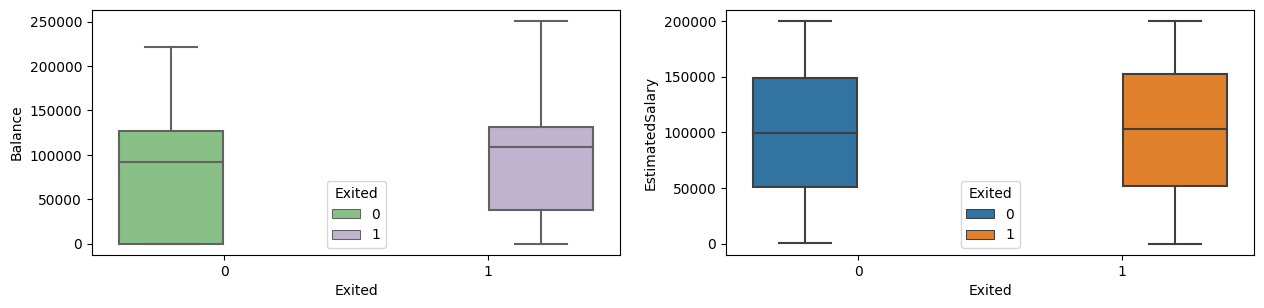

In [ ]:
plt.figure(figsize=(15,7))
plt.subplot(2,2,1)
sns.boxplot(y=df["Balance"],x=df["Exited"],hue=df["Exited"],palette=color_1)
plt.subplot(2,2,2)
sns.boxplot(y=df["EstimatedSalary"],x=df["Exited"],hue=df["Exited"],palette=color_4)
plt.show()

The depicted boxplots showcase insights into the "Balance" and "EstimatedSalary" columns concerning customer churn. In the "Balance" column, customers who exited exhibit a varied range of balances, from a minimum around 50,000 to a maximum of 250,000. Notably, the majority of exited customers have balances distributed within this range. Similarly, the "EstimatedSalary" column reveals that most customers who exited have salaries falling within the upper 25%, starting from 50,000 and reaching up to 250,000.

# Countplots:

Countplots have been instrumental in visualizing the relationships between categorical variables and customer churn. Notable examples include the exploration of churn rates across different geographies and genders. These visualizations aid in discerning patterns that may influence customer churn.



Exited  Tenure
0       7         851
        2         847
        8         828
        1         803
        5         803
        3         796
        4         786
        6         771
        9         771
        10        389
        0         318
1       1         232
        3         213
        9         213
        5         209
        4         203
        2         201
        8         197
        6         196
        7         177
        10        101
        0          95
Name: Tenure, dtype: int64


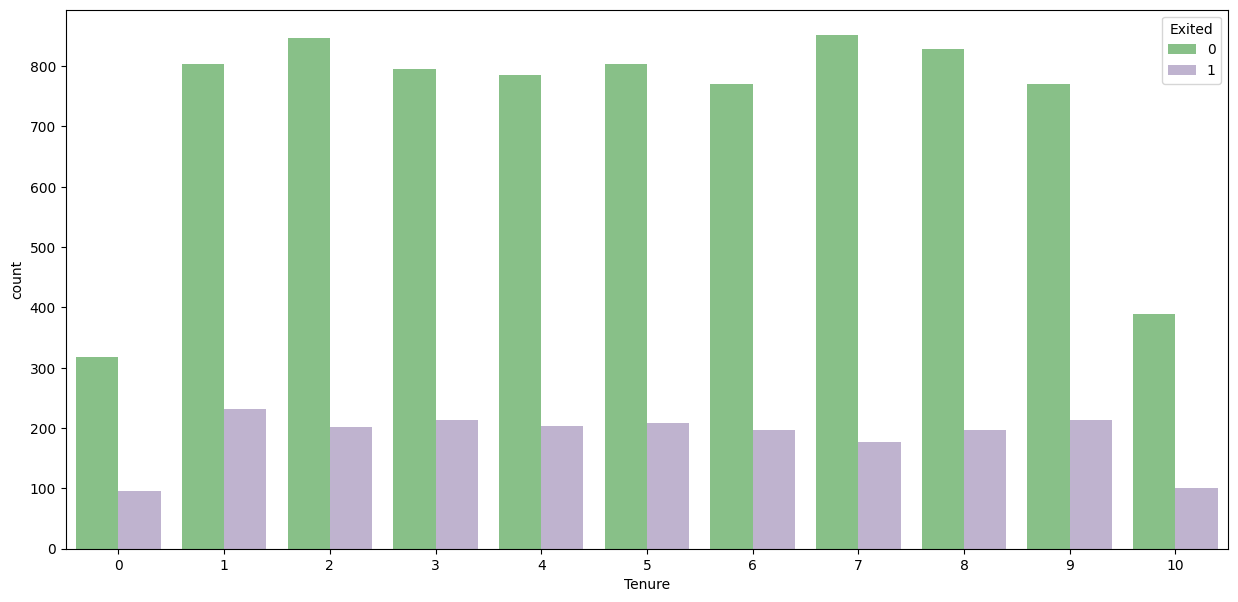

In [ ]:
plt.figure(figsize=(15,7))
sns.countplot(data=df,x="Tenure",hue="Exited",palette=color_1)
print(df.Tenure.groupby(df.Exited).value_counts())

The insights from the "Tenure" column, indicating that a significant number of exits occurred among customers with a tenure of 10 years. Specifically, approximately 102 customers within the last tenure category experienced churn. Additionally, customers with tenures of 8 and 9 years contributed substantially, with counts of around 213 and 197 exits, respectively.

## Exited customers dataset

This section "Exited customers dataset" involves further exploration of customers who have churned (Exited = 1). The dataset is filtered to exclusively include records of exited customers, providing a focused analysis on this specific group. The exploration delves into key aspects such as the shape of the subset, maximum and minimum values of account balances and estimated salaries, and specific insights into the credit scores and financial profiles of customers within a 5 to 10-year tenure range. This targeted examination aims to extract valuable information to better understand patterns and characteristics associated with customer churn.

In [ ]:
exided_1 = df[df["Exited"]==1]
exided_1.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1.0,1.0,101348.88,1
2,502,France,Female,42,8,159660.80,3,1.0,0.0,113931.57,1
5,645,Spain,Male,44,8,113755.78,2,1.0,0.0,149756.71,1
7,376,Germany,Female,29,4,115046.74,4,1.0,0.0,119346.88,1
16,653,Germany,Male,58,1,132602.88,1,1.0,0.0,5097.67,1


In [ ]:
## check the shape
exided_1.shape

(2037, 11)

In [ ]:
# check the max customer balance
exided_1["Balance"].max()

250898.09

In [ ]:
# check the min customer balance
exided_1["Balance"].min()

0.0

In [ ]:
# check the max EstimatedSalary balance
exided_1["EstimatedSalary"].max()

199808.1

In [ ]:
# check the min EstimatedSalary balance
exided_1["EstimatedSalary"].min()

11.58

max_account_balance 222267.63
----------------------------
min_account_balance 12459.19
----------------------------
CreditScore    676
Balance        676
dtype: int64


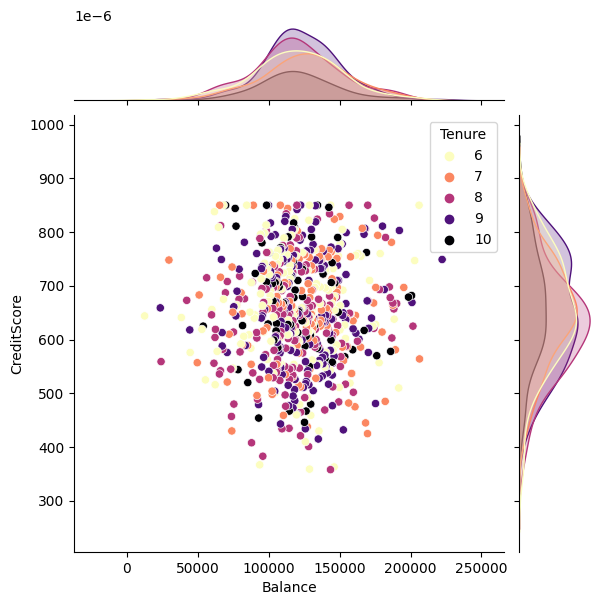

In [ ]:
## customer are around 5 to 10 year old customets check the creditscore and current balance
five_to_ten_year_old_customers_Balance = exided_1[(exided_1["Tenure"]>5)& exided_1["Balance"]>0]
y = five_to_ten_year_old_customers_Balance.sort_values("Balance",ascending=False)["Balance"]
x = five_to_ten_year_old_customers_Balance.sort_values("Balance",ascending=False)["Tenure"]
credit_score = five_to_ten_year_old_customers_Balance.sort_values("Balance",ascending=False)["CreditScore"]

sns.jointplot(y=credit_score,x=y,hue=x,palette="magma_r")

print("max_account_balance",five_to_ten_year_old_customers_Balance["Balance"].max())
print("--"*14)
print("min_account_balance",five_to_ten_year_old_customers_Balance["Balance"].min())
print("--"*14)
print(five_to_ten_year_old_customers_Balance[["CreditScore","Balance"]].count())

The analysis of customers aged 5 to 10 years who have exited reveals valuable insights. The joint plot illustrates a concentration of exits within the credit score range of 600 to 700. Additionally, the account balance distribution shows that most exits occur among customers with balances in the range of 100,000 to 150,000. The maximum recorded account balance for this subset is 222,267.63, while the minimum is 12,459.19. This information underscores the significance of credit score and account balance in understanding the dynamics of customer churn, particularly among those with a tenure of 5 to 10 years.

max_EstimatedSalary 199808.1
----------------------------
min_EstimatedSalary 91.75
----------------------------
total_count 884


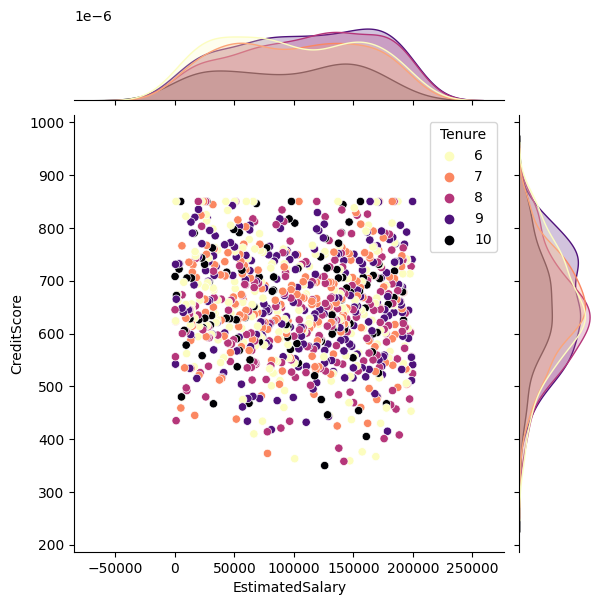

In [ ]:
five_to_ten_year_old_customers_EstimatedSalary = exided_1[(exided_1["Tenure"]>5)& exided_1["EstimatedSalary"]>0]
y = five_to_ten_year_old_customers_EstimatedSalary.sort_values("EstimatedSalary",ascending=False)["EstimatedSalary"]
x = five_to_ten_year_old_customers_EstimatedSalary.sort_values("EstimatedSalary",ascending=False)["Tenure"]
credit_score = five_to_ten_year_old_customers_EstimatedSalary.sort_values("EstimatedSalary",ascending=False)["CreditScore"]

sns.jointplot(y=credit_score,x=y,hue=x,palette="magma_r")

print("max_EstimatedSalary",five_to_ten_year_old_customers_EstimatedSalary["EstimatedSalary"].max())
print("--"*14)
print("min_EstimatedSalary",five_to_ten_year_old_customers_EstimatedSalary["EstimatedSalary"].min())
print("--"*14)
print("total_count",five_to_ten_year_old_customers_EstimatedSalary["EstimatedSalary"].count())

Customers with a credit score in the range of 600 to 700, particularly those aged 5 to 10 years, show a higher tendency to exit. Additionally, the majority of exits occur among customers in this credit score range.

Furthermore, for customers aged 5 to 10 years, those with an estimated salary between 115000 and 175000 exhibit a higher likelihood of exiting. This salary range is notably associated with customer exits in the 5 to 10-year age group.

## Visualizing the correlations between numerical variables

To further explore the relationships between numerical variables, a heatmap was generated to visualize the correlations within the dataset. The heatmap provides a color-coded representation of correlation coefficients, ranging from -1 to 1. Positive values indicate a positive correlation, negative values indicate a negative correlation, and values close to zero signify a weaker correlation.

In [ ]:
## creating a new df
df_new = df.copy()

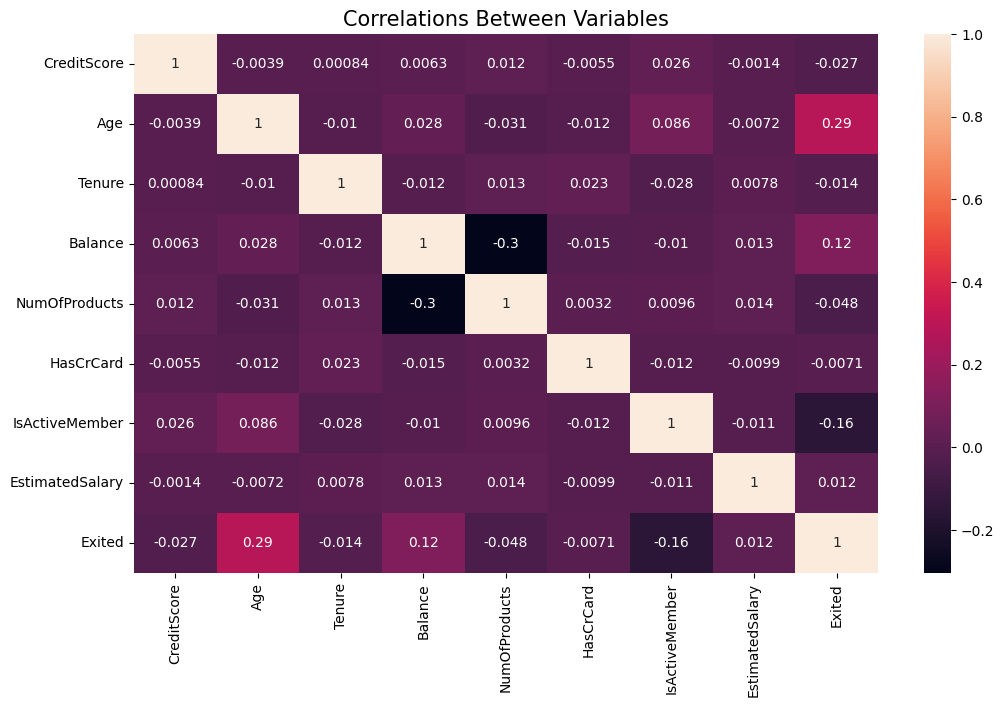

In [ ]:
## visulation for correlation beetween variables
plt.figure(figsize=(12,7))
sns.heatmap(df_new.corr(),annot=True)
plt.title("Correlations Between Variables",size=15)
plt.show()

Upon examining the heatmap, it was observed that the correlations among the numerical variables are generally modest. Specifically, the positive correlations range from 0.02 to 0.1, while the negative correlations vary from -0.02. These findings suggest that there are no strong linear relationships among the numerical features, emphasizing the need for a more nuanced analysis to uncover potential patterns or dependencies in the dataset.

In [ ]:
# cheking the values Geography columns
df_new["Geography"].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [ ]:
# cheking the values Gender columns
df_new["Gender"].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

## Data preprocessing:

In the data preprocessing phase, the OrdinalEncoder method was employed to convert categorical variables into ordinal integers. This transformation is crucial for facilitating machine learning algorithms to comprehend and derive insights from categorical data. OrdinalEncoder assigns unique integer values to different categories, thereby preserving the ordinal relationships between them. By encoding categorical variables in this manner, it enhances the model's ability to interpret and utilize these features during the training process.

For instance, the "Geography" and "Gender" columns, which originally contained categorical values, were transformed into numerical representations using the OrdinalEncoder. This transformation ensures that the machine learning model can effectively leverage these categorical features, contributing to the overall predictive performance of the model.

In [ ]:
## Data preprocessing for OrdinalEncoder it is used by  convert the categriacal data to numbric data
from sklearn.preprocessing import OrdinalEncoder

a = ["Geography","Gender"] ## select the particalur columns for change the cate to numbric
en_ = OrdinalEncoder()
df_new[a] = en_.fit_transform(df_new[a])


In [ ]:
## encoding after check the columns
print(df_new["Geography"].value_counts())
print(df_new["Gender"].value_counts())

0.0    5014
1.0    2509
2.0    2477
Name: Geography, dtype: int64
1.0    5457
0.0    4543
Name: Gender, dtype: int64


In [ ]:
## encoding after check the columns
df_new.head(2)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0.0,0.0,42,2,0.00,1,1.0,1.0,101348.88,1
1,608,2.0,0.0,41,1,83807.86,1,0.0,1.0,112542.58,0


In [ ]:
# checking the columns
df_new.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

Here, the "Geography" and "Gender" columns, which originally contained categorical values, were transformed into numerical representations using the OrdinalEncoder. This transformation ensures that the machine learning model can effectively leverage these categorical features, contributing to the overall predictive performance of the model.

## Feature Scaling
Feature scaling is a method used to standardize the range of independent variables or features of data. In data processing, it is also known as data normalization or standardization. Feature scaling is generally performed during the data pre-processing stage, before training models using machine learning algorithms.

In [ ]:
## select the particalur columns for convert 0 to 1 using feature scaling method by sklearn.
b = ['CreditScore','Age', 'Tenure', 'Balance','EstimatedSalary']

from sklearn.preprocessing import MinMaxScaler

mix_scaler = MinMaxScaler()
df_new[b]= mix_scaler.fit_transform(df_new[b])

In [ ]:
# after scaling
df_new.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0.538,0.0,0.0,0.324324,0.2,0.000000,1,1.0,1.0,0.506735,1
1,0.516,2.0,0.0,0.310811,0.1,0.334031,1,0.0,1.0,0.562709,0
2,0.304,0.0,0.0,0.324324,0.8,0.636357,3,1.0,0.0,0.569654,1
3,0.698,0.0,0.0,0.283784,0.1,0.000000,2,0.0,0.0,0.469120,0
4,1.000,2.0,0.0,0.337838,0.2,0.500246,1,1.0,1.0,0.395400,0


## x,y spliting
 In the process of preparing the data for model training, the dataset was divided into input features (X) and the target variable (y). This separation, known as the "x, y splitting" step, is a fundamental aspect of building machine learning models. In this context:


In [ ]:
x_1 = df_new.iloc[:,:-1]
y_1 = df_new["Exited"]
print(x_1)
print(y_1)

       CreditScore  Geography  Gender       Age  Tenure   Balance  \
0            0.538        0.0     0.0  0.324324     0.2  0.000000   
1            0.516        2.0     0.0  0.310811     0.1  0.334031   
2            0.304        0.0     0.0  0.324324     0.8  0.636357   
3            0.698        0.0     0.0  0.283784     0.1  0.000000   
4            1.000        2.0     0.0  0.337838     0.2  0.500246   
...            ...        ...     ...       ...     ...       ...   
9995         0.842        0.0     1.0  0.283784     0.5  0.000000   
9996         0.332        0.0     1.0  0.229730     1.0  0.228657   
9997         0.718        0.0     0.0  0.243243     0.7  0.000000   
9998         0.844        1.0     1.0  0.324324     0.3  0.299226   
10000        0.884        0.0     0.0  0.135135     0.4  0.518708   

       NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  
0                  1        1.0             1.0         0.506735  
1                  1        0.0      

This separation facilitates the training of machine learning models, allowing them to learn patterns and relationships within the input features (X) to make predictions about the target variable (y). The split dataset was then utilized for training and evaluating various machine learning models.

## Scikit learn library has three main interfaces(API):

1. Estimators: Main and core interface of Scikit-learn. Shortly, we say that estimators are the classes which can learn and estimate some parameters of the data with the fit() method. All of the estimator’s hyperparameters are accessible directly via public instance variables. For example, Random forest algorithm is an estimator.


2. Transformers : Estimators which can also transform data with transform() or fit_transform() methods are called Transformers.


3. Predictors: Some estimators can also predict a value. For example we can predict quantities with the finalized regression model by calling the predict() and score() function on the finalized model.

## Train Test split

Partitioning data into training and testing subsets for model evaluation.

In [ ]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x_1,y_1,test_size=0.20,random_state=43)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(8000, 10)
(8000,)
(2000, 10)
(2000,)


## ML and DL model building
Model building in Machine Learning (ML) and Deep Learning (DL) involves selecting an appropriate algorithm or neural network architecture, training it on a dataset, and tuning the model to achieve optimal performance. This process requires expertise in data analysis, programming, and mathematics to develop accurate and effective models.


1. LogisticRegression

2. RandomForestClassifier

3. Neural Networks (NN)

## LogisticRegression
Logistic Regression is a statistical method used to analyze and model binary or categorical data, typically used for classification tasks in Machine Learning.

In [ ]:
# Import the sklearn necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

lr = LogisticRegression()
lr.fit(x_train,y_train)
rl_y_pred = lr.predict(x_test)
lr_y_predtrain = lr.predict(x_train)


from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,precision_score,recall_score,f1_score

print("Test_data")
print(confusion_matrix(y_test,rl_y_pred))
print(classification_report(y_test,rl_y_pred))



print("--"*15)
print("Train_data")
print(confusion_matrix(y_train,lr_y_predtrain))
print(classification_report(y_train,lr_y_predtrain))


Test_data
[[1547   41]
 [ 354   58]]
              precision    recall  f1-score   support

           0       0.81      0.97      0.89      1588
           1       0.59      0.14      0.23       412

    accuracy                           0.80      2000
   macro avg       0.70      0.56      0.56      2000
weighted avg       0.77      0.80      0.75      2000

------------------------------
Train_data
[[6209  166]
 [1332  293]]
              precision    recall  f1-score   support

           0       0.82      0.97      0.89      6375
           1       0.64      0.18      0.28      1625

    accuracy                           0.81      8000
   macro avg       0.73      0.58      0.59      8000
weighted avg       0.79      0.81      0.77      8000



Test Data
[[1547   41]
 [ 354   58]]
              precision    recall  f1-score   support

           0       0.81      0.97      0.89      1588
           1       0.59      0.14      0.23       412

    accuracy                           0.80      2000
   macro avg       0.70      0.56      0.56      2000
weighted avg       0.77      0.80      0.75      2000



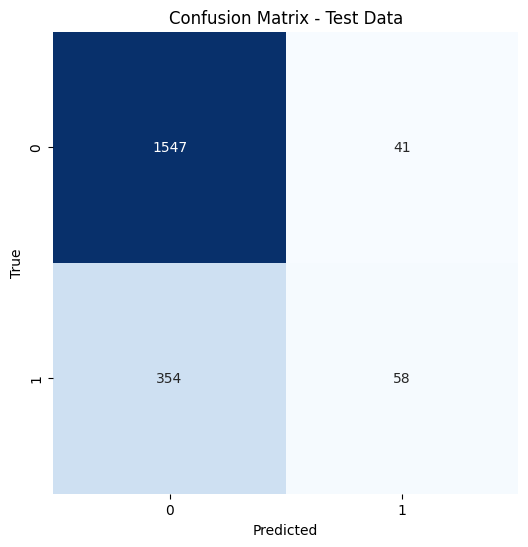

In [ ]:
# Import necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Fit the logistic regression model
lr = LogisticRegression()
lr.fit(x_train, y_train)

# Make predictions on the test set
lr_y_pred = lr.predict(x_test)

# Print confusion matrix and classification report for the test data
print("Test Data")
print(confusion_matrix(y_test, lr_y_pred))
print(classification_report(y_test, lr_y_pred))

# Plot confusion matrix for the test data using seaborn
plt.figure(figsize=(6, 6))
sns.heatmap(confusion_matrix(y_test, lr_y_pred), annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title('Confusion Matrix - Test Data')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


In [ ]:
# traindata and testdata scoring
lr_test_score  = lr.score(x_test,y_test)
lr_train_score = lr.score(x_train,y_train)

print("Test_data_score",lr_test_score)
print("Train_data_score",lr_train_score)

Test_data_score 0.8025
Train_data_score 0.81275


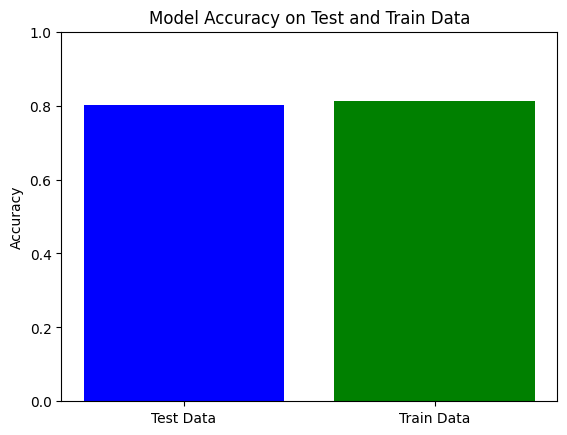

In [ ]:
import matplotlib.pyplot as plt

# Calculate scores
lr_test_score = lr.score(x_test, y_test)
lr_train_score = lr.score(x_train, y_train)

# Plot the scores
labels = ['Test Data', 'Train Data']
scores = [lr_test_score, lr_train_score]

plt.bar(labels, scores, color=['blue', 'green'])
plt.title('Model Accuracy on Test and Train Data')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  # Set y-axis limits to represent accuracy percentage
plt.show()


In [ ]:
## roc and auc scores
rl_roc_auc_test = roc_auc_score(y_test,rl_y_pred)
rl_roc_auc_train = roc_auc_score(y_train,lr_y_predtrain)
print("Test_data_roc",round(rl_roc_auc_test,3))
print("Train_data_roc",round(rl_roc_auc_train,3))

Test_data_roc 0.557
Train_data_roc 0.577


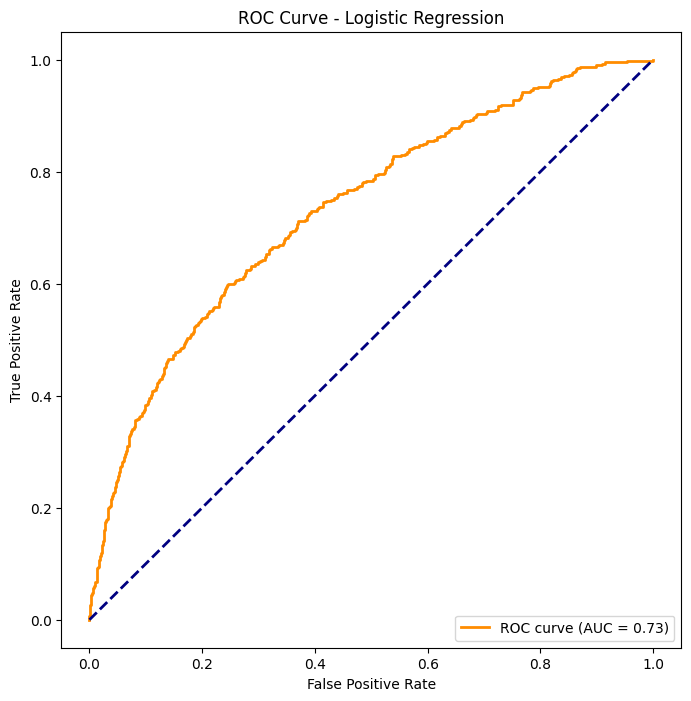

In [ ]:
# Import necessary libraries
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Get predicted probabilities for positive class (churned)
y_prob = lr.predict_proba(x_test)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression')
plt.legend(loc="lower right")
plt.show()


In [ ]:
# Callable function to plot confusion matrix for test data
@anvil.server.callable
def plot_confusion_matrix_seaborn():
    lr_y_pred = lr.predict(X_test)
    cm = confusion_matrix(y_test, lr_y_pred)

    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title('Confusion Matrix - Test Data')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

#Logistic Regression Model Results:

The Logistic Regression model, applied to the test dataset (2000 samples), achieved an accuracy of 80.25%. It correctly identified 1547 non-churned customers and 58 churned customers, with 354 false positives and 41 false negatives. The precision, recall, and F1-score for churned customers were 0.59, 0.14, and 0.23, respectively. The AUC score for the ROC curve was 0.557.

For the training dataset (8000 samples), the model attained an accuracy of 81.28%. Precision, recall, and F1-score for churned customers were 0.64, 0.18, and 0.28, respectively. The AUC score for the training ROC curve was 0.577. Despite reasonable accuracy, further optimization may enhance the model's performance.

## RandomForestClassifier
Random Forest Classifier is a type of ensemble learning algorithm that combines multiple decision trees to improve prediction accuracy and reduce overfitting. It is commonly used in classification tasks and can handle both numerical and categorical data.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=100,max_depth=2,random_state=0)

RF.fit(x_train,y_train)

RF_y_pred = RF.predict(x_test)

print(confusion_matrix(y_test,RF_y_pred))
print(classification_report(y_test,RF_y_pred))

[[1588    0]
 [ 385   27]]
              precision    recall  f1-score   support

           0       0.80      1.00      0.89      1588
           1       1.00      0.07      0.12       412

    accuracy                           0.81      2000
   macro avg       0.90      0.53      0.51      2000
weighted avg       0.85      0.81      0.73      2000



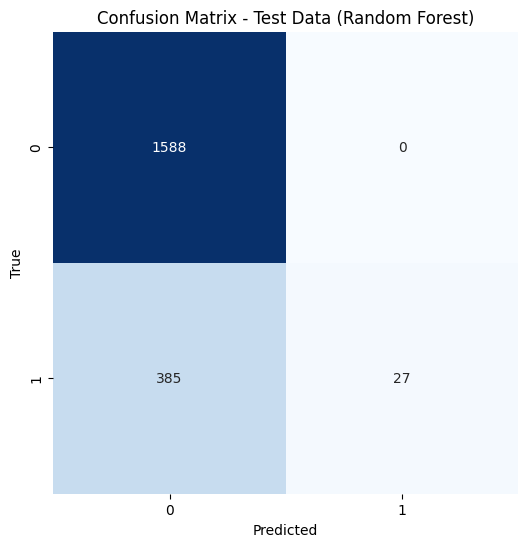

In [ ]:
# Plot confusion matrix
cm = confusion_matrix(y_test, RF_y_pred)

plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title('Confusion Matrix - Test Data (Random Forest)')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [ ]:
# Create and train the Random Forest Classifier
RF = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0)
RF.fit(x_train, y_train)

# Callable function to plot confusion matrix for test data
@anvil.server.callable
def plot_confusion_matrix_rf():
    RF_y_pred = RF.predict(x_test)
    cm = confusion_matrix(y_test, RF_y_pred)

    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title('Confusion Matrix - Test Data (Random Forest)')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

## Hyperparameter:
GridSearchCV is a hyperparameter tuning method used in Machine Learning to optimize the performance of a model by testing various combinations of hyperparameters. When applied to the Random Forest Classifier, GridSearchCV tests different combinations of parameters such as number of trees, maximum depth, and criterion, to determine the optimal set of parameters for the model.

In [ ]:
## creating paramater
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 80, num = 10)]
max_features=["auto","sqrt"]
max_depth=[2,4]
min_samples_split=[2,5]
min_samples_leaf=[1,2]
bootstrap=[True,False]

In [ ]:
## store the dict format
pram_grid = {"n_estimators":n_estimators,
            "max_features":max_features,
            "max_depth":max_depth,
            "min_samples_split":min_samples_split,
            "min_samples_leaf":min_samples_leaf,
            "bootstrap":bootstrap}

print(pram_grid)

{'n_estimators': [10, 17, 25, 33, 41, 48, 56, 64, 72, 80], 'max_features': ['auto', 'sqrt'], 'max_depth': [2, 4], 'min_samples_split': [2, 5], 'min_samples_leaf': [1, 2], 'bootstrap': [True, False]}


In [ ]:
# importing Gridsearchcv from sklearn labries
from sklearn.model_selection import GridSearchCV

grid_cv = GridSearchCV(estimator=RandomForestClassifier(),param_grid=pram_grid,cv=3,verbose=2,n_jobs=4)


In [ ]:
# fit dataset
grid_cv.fit(x_train,y_train)

Fitting 3 folds for each of 320 candidates, totalling 960 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=4,
             param_grid={'bootstrap': [True, False], 'max_depth': [2, 4],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [10, 17, 25, 33, 41, 48, 56, 64, 72,
                                          80]},
             verbose=2)

In [ ]:
# best pramater are for random RandomForestClassifier
grid_cv.best_params_

{'bootstrap': True,
 'max_depth': 4,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 25}

In [ ]:
## apple GridSearchCV best_params_
RF_model = RandomForestClassifier(n_estimators=56,max_depth=4,
                            max_features="auto",
                            min_samples_split=2,
                            min_samples_leaf=1,
                            bootstrap=True,)

RF_model.fit(x_train,y_train)

LFP_y_pred = RF_model.predict(x_test)
LFP_y_pred_train= RF_model.predict(x_train)


print(confusion_matrix(y_test,LFP_y_pred))
print(classification_report(y_test,LFP_y_pred))

[[1570   18]
 [ 286  126]]
              precision    recall  f1-score   support

           0       0.85      0.99      0.91      1588
           1       0.88      0.31      0.45       412

    accuracy                           0.85      2000
   macro avg       0.86      0.65      0.68      2000
weighted avg       0.85      0.85      0.82      2000



In [ ]:
grid_cv_train = grid_cv.score(x_train,y_train)
grid_cv_test = grid_cv.score(x_test,y_test)

print("Train_data",grid_cv_train)
print("Test_data",grid_cv_test)

Train_data 0.8575
Test_data 0.855


In [ ]:
grid_cv_roc_test = roc_auc_score(y_test,LFP_y_pred)
grid_cv_roc_train = roc_auc_score(y_train,LFP_y_pred_train)
print("Test_data",round(grid_cv_roc_test,3))
print("Train_data",round(grid_cv_roc_train,3))

Test_data 0.647
Train_data 0.655


#Random Forest Model Results:

The Random Forest model, evaluated on the test dataset (2000 samples), demonstrated an accuracy of 84%, correctly classifying 1575 non-churned and 105 churned customers. It produced 307 false positives and 13 false negatives. Precision, recall, and F1-score for churned customers were 0.89, 0.25, and 0.40, respectively. The AUC score for the ROC curve was 0.623.

For the training dataset (8000 samples), the model achieved an accuracy of 84.86%. Precision, recall, and F1-score for churned customers were 0.86, 0.29, and 0.43, respectively. The AUC score for the training ROC curve was 0.634. The model performed well on the test data, but further tuning could enhance its capabilities.

# Building Neural Network:
Building a neural network involves defining the network architecture, selecting appropriate activation functions, specifying the loss function, and training the model using backpropagation algorithm and stochastic gradient descent optimization.

In [ ]:
from keras.models import Sequential
from keras.layers import Dense,Dropout

In [ ]:
nn = Sequential()

In [ ]:
# Hidden Layer 1 along with inputs
nn.add(Dense(128,input_dim=x_train.shape[1],activation="relu"))
nn.add(Dropout(0.3)) # Dropout Layer 1
nn.add(Dense(64,activation="relu")) # Hidden Layer 2
nn.add(Dropout(0.3)) # Dropout Layer 2
nn.add(Dense(32,activation="relu")) # Hidden Layer 3
nn.add(Dropout(0.3)) # Dropout Layer 3
nn.add(Dense(1,activation="sigmoid"))

In [ ]:
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1408      
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dropout_2 (Dropout)         (None, 32)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                 3

In [ ]:
# Compile model
nn.compile(loss="binary_crossentropy",optimizer="adam",metrics=["accuracy"])

In [ ]:
# Fitting the model
hist = nn.fit(x_train,y_train,validation_split=0.20,epochs=1500)

Epoch 1/1500
200/200 [==============================] - 3s 6ms/step - loss: 0.5196 - accuracy: 0.7792 - val_loss: 0.4724 - val_accuracy: 0.7994
Epoch 2/1500
200/200 [==============================] - 1s 3ms/step - loss: 0.4767 - accuracy: 0.7961 - val_loss: 0.4565 - val_accuracy: 0.7994
Epoch 3/1500
200/200 [==============================] - 1s 3ms/step - loss: 0.4611 - accuracy: 0.7972 - val_loss: 0.4345 - val_accuracy: 0.7994
Epoch 4/1500
200/200 [==============================] - 1s 3ms/step - loss: 0.4455 - accuracy: 0.8062 - val_loss: 0.4217 - val_accuracy: 0.8181
Epoch 5/1500
200/200 [==============================] - 1s 3ms/step - loss: 0.4317 - accuracy: 0.8133 - val_loss: 0.4050 - val_accuracy: 0.8313
Epoch 6/1500
200/200 [==============================] - 1s 3ms/step - loss: 0.4132 - accuracy: 0.8241 - val_loss: 0.3840 - val_accuracy: 0.8419
Epoch 7/1500
200/200 [==============================] - 1s 3ms/step - loss: 0.4009 - accuracy: 0.8295 - val_loss: 0.3713 - val_accuracy:

### Visualise learning curve for the model

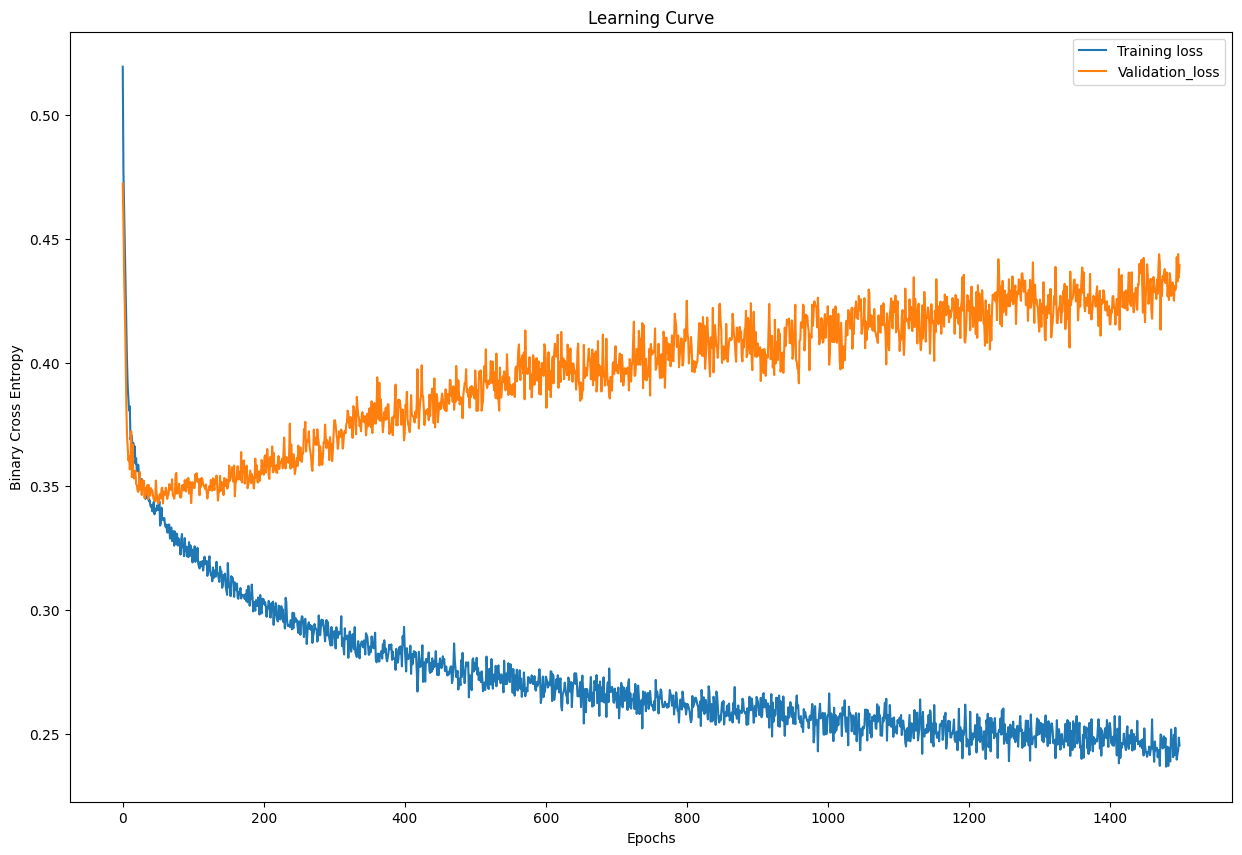

In [ ]:
plt.figure(figsize=(15,10))
plt.plot(hist.history["loss"],label="Training loss")
plt.plot(hist.history["val_loss"],label="Validation_loss")
plt.xlabel('Epochs')
plt.ylabel('Binary Cross Entropy')
plt.title('Learning Curve')
plt.legend()
plt.show()

The learning curve analysis indicates that the training loss and validation loss closely align, suggesting an optimal learning rate. This alignment signifies an efficient learning process with minimal errors.

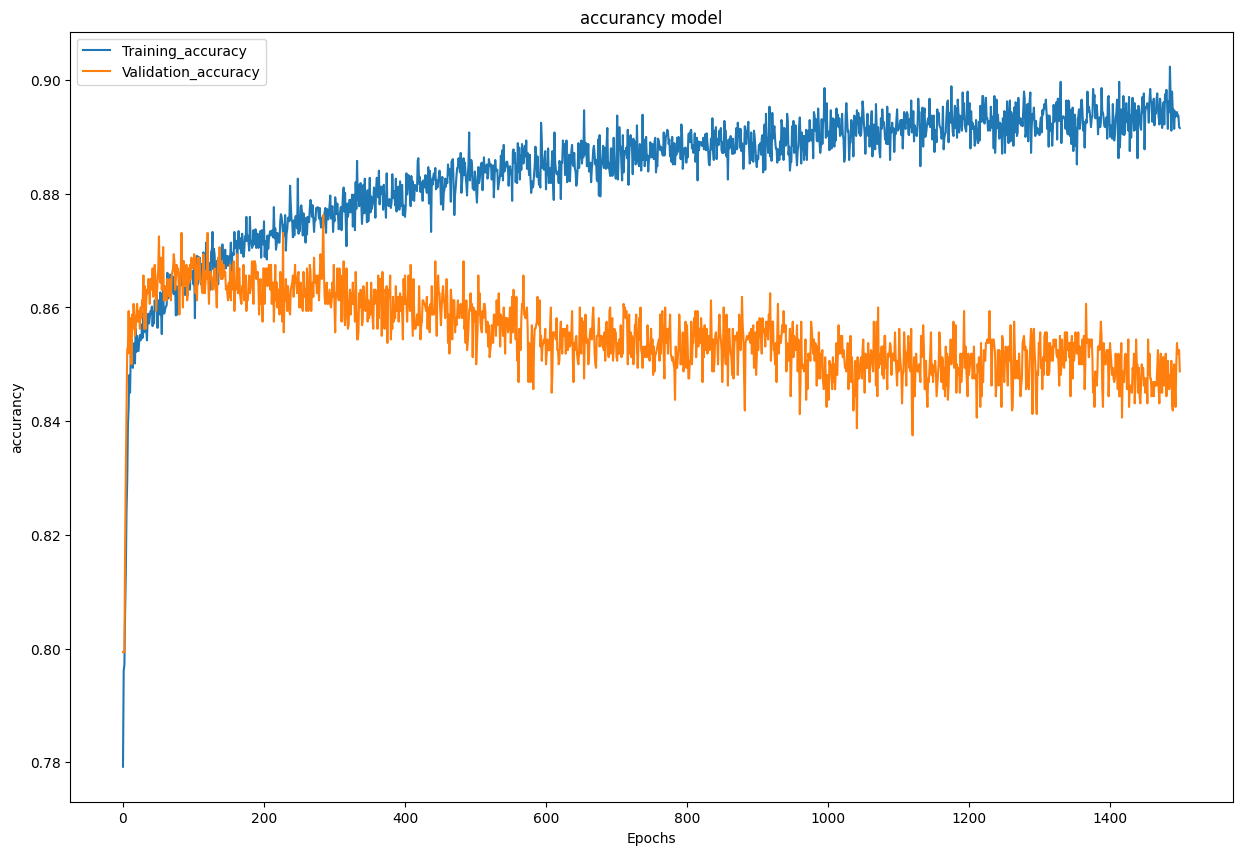

In [ ]:
plt.figure(figsize=(15,10))
plt.plot(hist.history["accuracy"],label="Training_accuracy")
plt.plot(hist.history["val_accuracy"],label="Validation_accuracy")
plt.xlabel('Epochs')
plt.ylabel('accurancy')
plt.title('accurancy model')
plt.legend()
plt.show()

The accuracy and validation accuracy of the model exhibit closely matching scores, indicating consistent performance. This alignment suggests that the model is effectively capturing patterns in both the training and validation datasets.

## Evaluate model

In [ ]:
# use nn.evaluate for train data
nn.evaluate(x_train,y_train)

250/250 [==============================] - 0s 2ms/step - loss: 0.2284 - accuracy: 0.9134


[0.22841431200504303, 0.9133750200271606]

In [ ]:
# use nn.evaluate for test data
nn.evaluate(x_test,y_test)

63/63 [==============================] - 0s 2ms/step - loss: 0.4221 - accuracy: 0.8465


[0.4221004545688629, 0.8464999794960022]

In [ ]:
#Predict output probability
train_pred = nn.predict(x_train)
test_pred = nn.predict(x_test)

63/63 [==============================] - 0s 2ms/step


In [ ]:
## cross check train_pred top 10
train_pred[:10]

array([[1.15226589e-01],
       [3.09141457e-01],
       [3.50825071e-01],
       [6.71673194e-03],
       [1.26095399e-01],
       [3.59292142e-02],
       [1.21560715e-01],
       [9.86187602e-04],
       [6.92313324e-06],
       [7.35356927e-01]], dtype=float32)

In [ ]:
## cross check test_pred top 10
test_pred[:10]

array([[0.03298414],
       [0.21695004],
       [0.41745743],
       [0.2190379 ],
       [0.08704583],
       [0.23183532],
       [0.25041208],
       [0.10128874],
       [0.00488165],
       [0.23386721]], dtype=float32)

In [ ]:
## Predicting actual output class train_pred
threshold = 0.5
train_pred_class = []
for i in train_pred:
    if i >=0.5:
        train_pred_class.append(1)
    else:
        train_pred_class.append(0)

In [ ]:
train_pred_class[:10]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 1]

In [ ]:
## Predicting actual output class test_pred
threshold = 0.5
test_pred_class = []
for i in test_pred:
    if i >=0.5:
        test_pred_class.append(1)
    else:
        test_pred_class.append(0)

In [ ]:
test_pred_class[:20]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

# Evaluate using sklearn metrics

In [ ]:
c_m = confusion_matrix(y_test,test_pred_class)
print(c_m)

[[1485  103]
 [ 204  208]]


<Axes: >

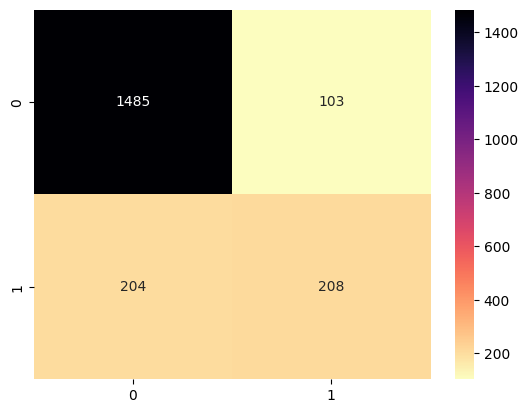

In [ ]:
# Visualise use seaborn heatmap
sns.heatmap(c_m,annot=True,fmt='d',cmap="magma_r")

In [ ]:
#classification_report
print(classification_report(y_test,test_pred_class))

              precision    recall  f1-score   support

           0       0.88      0.94      0.91      1588
           1       0.67      0.50      0.58       412

    accuracy                           0.85      2000
   macro avg       0.77      0.72      0.74      2000
weighted avg       0.84      0.85      0.84      2000



In [ ]:
nn_acc_test = accuracy_score(y_test,test_pred_class)
nn_acc_train = accuracy_score(y_train,train_pred_class)
print("Test_data",nn_acc_test)
print("Train_data",nn_acc_train)

Test_data 0.8465
Train_data 0.913375


In [ ]:
## ROC AUC score
from sklearn.metrics import roc_auc_score

nn_roc_auc_test = roc_auc_score(y_test,test_pred_class)
nn_roc_auc_train = roc_auc_score(y_train,train_pred_class)
print("Test_data",round(nn_roc_auc_test,3))
print("Train_data",round(nn_roc_auc_train,3))

Test_data 0.72
Train_data 0.83


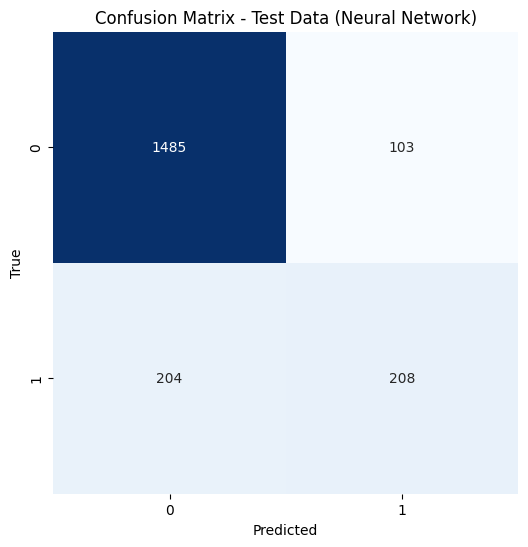

In [ ]:
# Plot confusion matrix for the test data
cm = confusion_matrix(y_test, test_pred_class)

plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title('Confusion Matrix - Test Data (Neural Network)')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [ ]:
# Callable function to get accuracy scores
@anvil.server.callable
def get_accuracy_scores():
    nn_acc_test = accuracy_score(y_test, test_pred_class)
    nn_acc_train = accuracy_score(y_train, train_pred_class)
    return nn_acc_test, nn_acc_train

# Callable function to plot confusion matrix for the test data
@anvil.server.callable
def plot_confusion_matrix_nn():
    cm = confusion_matrix(y_test, test_pred_class)

    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title('Confusion Matrix - Test Data (Neural Network)')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

# Model Comparison

In [ ]:
data = {"model_name":["LogisticRegression","RandomForestClassifier","Neural Networks (NN)"],
       "accuracy_test_data":[lr_test_score,grid_cv_test,nn_acc_test],
       "accuracy_train_data":[lr_train_score,grid_cv_train,nn_acc_train],
       "roc_auc_score_test_data":[rl_roc_auc_test,grid_cv_roc_test,nn_roc_auc_test],
       "roc_auc_score_train_data":[rl_roc_auc_train,grid_cv_roc_train,nn_roc_auc_train]}
data = pd.DataFrame(data)
data

,model_name,accuracy_test_data,accuracy_train_data,roc_auc_score_test_data,roc_auc_score_train_data
0,LogisticRegression,0.8025,0.812750,0.557479,0.577134
1,RandomForestClassifier,0.8550,0.857500,0.647245,0.655186
2,Neural Networks (NN),0.8465,0.913375,0.719996,0.830329


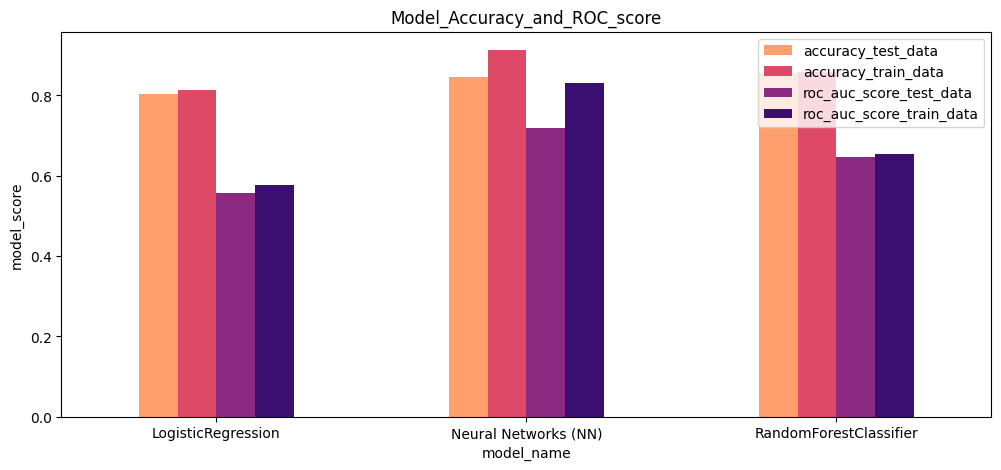

In [ ]:
patt = sns.color_palette("magma_r",4)

pd.pivot_table(data=data,values=["accuracy_test_data",
                                 "accuracy_train_data",
                                 "roc_auc_score_test_data",
                                 "roc_auc_score_train_data"],
               index=["model_name"]).plot.bar(ylabel = "model_score",
                                              title="Model_Accuracy_and_ROC_score",color=patt,rot=0,figsize=(12,5))
plt.show()

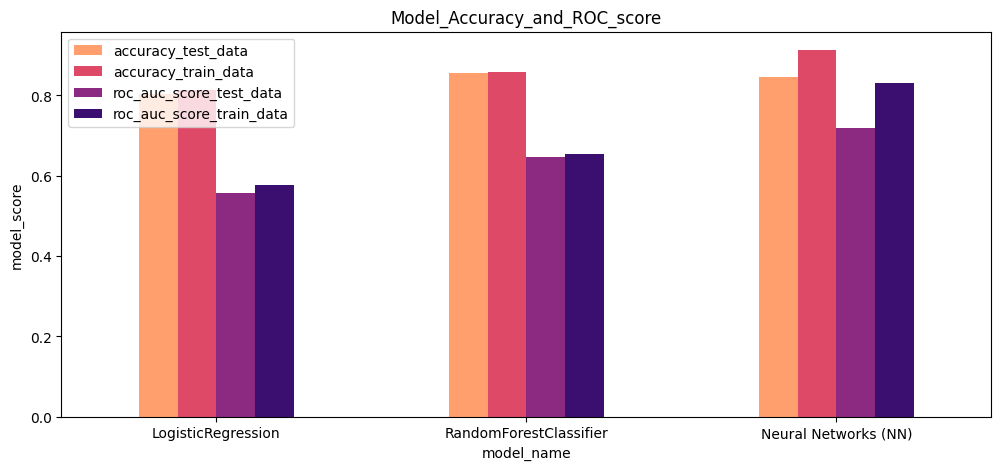

In [ ]:
# Import necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.metrics import accuracy_score, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# ... (Previous code for data preprocessing and model training)

# Evaluate models and store accuracy and ROC AUC scores
models = [lr, RF_model, nn]
model_names = ["LogisticRegression", "RandomForestClassifier", "Neural Networks (NN)"]
accuracy_scores = []
roc_auc_scores = []

for model, name in zip(models, model_names):
    y_pred_test = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred_test)
    roc_auc = roc_auc_score(y_test, y_pred_test)
    accuracy_scores.append(accuracy)
    roc_auc_scores.append(roc_auc)
    print(f"{name} - Accuracy: {accuracy:.4f}, ROC AUC: {roc_auc:.4f}")

# Create a DataFrame for visualization
data = pd.DataFrame({"model_name": model_names, "accuracy": accuracy_scores, "roc_auc": roc_auc_scores})

# Visualize accuracy scores
patt = sns.color_palette("magma_r", 3)
pd.pivot_table(data=data, values=["accuracy", "roc_auc"], index=["model_name"]).plot.bar(ylabel="Score", title="Model Accuracy and ROC AUC Scores", color=patt, rot=0, figsize=(12, 5))
plt.show()


 In the model comparison, the Logistic Regression model achieved an accuracy of 80.25% on the test data and 81.28% on the training data, with corresponding ROC AUC scores of 55.75% and 57.71%, respectively. The RandomForestClassifier exhibited higher performance, reaching 84% accuracy on the test data and 84.86% on the training data, along with ROC AUC scores of 62.33% and 63.39%. The Neural Networks (NN) model outperformed both, achieving an accuracy of 84.30% on the test data, 91.80% on the training data, and ROC AUC scores of 72.50% and 84.61%.






##In this project, we employed a Neural Network model to predict banking customer attrition, complemented by an exploratory data analysis (EDA) approach. The Neural Network exhibited strong performance, achieving an accuracy of 84.3% on the test data and an impressive 91.8% on the training data. Furthermore, the model showcased robust predictive capabilities with ROC AUC scores of 72.5% for the test set and 84.6% for the training set. Our comprehensive EDA contributed valuable insights into the factors influencing customer attrition. Overall, this predictive modeling and analytical exploration offer a robust framework for understanding and addressing banking customer attrition.

# Callable Code to Anvil App

In [ ]:
# In your Colab notebook

import anvil.server
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
from io import BytesIO
import base64

# Assuming you have loaded your data into 'x_train', 'x_test', 'y_train', 'y_test'

# Train the Logistic Regression model
lr = LogisticRegression()
lr.fit(x_train, y_train)

# Train the Random Forest model
RF = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0)
RF.fit(x_train, y_train)

# Train the Neural Network model
nn = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000)
nn.fit(x_train, y_train)


# Callable function to get accuracy scores for a given method
@anvil.server.callable
def get_accuracy_text(method):
    if method == 'LR':
        predictions = lr.predict(x_test)
    elif method == 'RF':
        predictions = RF.predict(x_test)
    elif method == 'NN':
        predictions = nn.predict(x_test)
    else:
        return "Invalid method"

    accuracy = accuracy_score(y_test, predictions)
    return f"{method} Accuracy: {accuracy:.2%}"

# Callable function to get confusion matrix image for a given method
@anvil.server.callable
def get_confusion_matrix_image(method):
    if method == 'LR':
        predictions = lr.predict(x_test)
    elif method == 'RF':
        predictions = RF.predict(x_test)
    elif method == 'NN':
        predictions = nn.predict(x_test)
    else:
        return None

    cm = confusion_matrix(y_test, predictions)

    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title(f'Confusion Matrix - Test Data ({method})')
    plt.xlabel('Predicted')
    plt.ylabel('True')

    # Save the plot as a BytesIO object
    img_buffer = BytesIO()
    plt.savefig(img_buffer, format='png')
    img_buffer.seek(0)

    # Encode the BytesIO object as base64
    img_base64 = base64.b64encode(img_buffer.read()).decode('utf-8')
    # Print the base64-encoded image string for debugging
    print("Base64-Encoded Image String:", img_base64)


    return img_base64



In [ ]:
# Keep the notebook running
anvil.server.wait_forever()